# Improving Computer Vision Accuracy using Convolutions

使用卷积提高计算机视觉准确度

In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sized of hidden layer, number of training epochs etc on the final accuracy.

在前面的课程中，您了解了如何使用包含三个层的深度神经网络（DNN）进行fashion_mnist识别 - 输入层（以数据的形状），输出层（以所需输出的形状）和隐藏层。您尝试了不同大小的隐藏层，训练时期数等对最终准确性的影响。

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end. 

为方便起见，这里是整个代码。运行它并记下最后打印出的测试精度。

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

W0815 21:20:54.373019 140166005057344 deprecation.py:506] From /home/fc/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4913 - acc: 0.8266
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3739 - acc: 0.8650
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3387 - acc: 0.8761
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3146 - acc: 0.8836
Epoch 5/5
10000/10000 [==============================] - 0s 47us/sample - loss: 0.3602 - acc: 0.8696


Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details. 

你的准确率大约是89％的培训和87％的验证......不错......但你怎么做得更好呢？一种方法是使用称为Convolutions的东西。我不会在这里详细讨论Convolutions，但最终的概念是他们缩小图像的内容以专注于特定的，不同的细节。

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

简而言之，您需要一个数组（通常为3x3或5x5）并将其传递给图像。通过基于该矩阵中的公式更改基础像素，您可以执行边缘检测等操作。因此，例如，如果您查看上面的链接，您将看到为边缘检测定义的3x3，其中中间单元格为8，并且其所有邻居都为-1。在这种情况下，对于每个像素，您将其值乘以8，然后减去每个邻居的值。对每个像素执行此操作，最终会得到一个边缘增强的新图像。

This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less...because you'll just train on the highlighted features.

这对于计算机视觉来说是完美的，因为通常它的功能可以像这样突出显示，将一个项目区分为另一个项目，然后所需的信息量就更少了......因为您只需要对突出显示的功能进行训练。

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

这就是卷积神经网络的概念。在具有密集层之前添加一些图层来进行卷积，然后进入密集层的信息更加集中，并且可能更准确。

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

运行以下代码 - 这是与之前相同的神经网络，但这次首先添加了卷积层。这需要更长的时间，但请注意对准确性的影响：

In [7]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


1.14.0
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)        

It's likely gone up to about 93% on the training data and 91% on the validation data. 

That's significant, and a step in the right direction!

Try running it for more epochs -- say about 20, and explore the results! But while the results might seem really good, the validation results may actually go down, due to something called 'overfitting' which will be discussed later. 

(In a nutshell, 'overfitting' occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at seeing *other* data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it, but blue suade shoes might confuse you...and you know you should never mess with my blue suede shoes.)

Then, look at the code again, and see, step by step how the Convolutions were built:


训练数据可能高达93％左右，验证数据高达91％。这是重要的，并朝着正确的方向迈出了一步！尝试运行它以获得更多轮数 - 比如大约20，并探索结果！但是虽然结果可能看起来非常好，但由于称为“过度拟合”的东西，验证结果实际上可能会下降，这将在后面讨论。（简而言之，当网络很好地从训练集中学习数据时会发生'过度拟合'，但它过于专业化而不仅仅是那些数据，因此在查看其他数据方面效果较差。例如，如果你的所有生命都是如此你只看到红色的鞋子，那么当你看到一双红色的鞋子时，你会非常擅长识别它，但是蓝色的鞋子可能会让你感到困惑......而且你知道你应该永远不要弄乱我的蓝色绒面革鞋子。）然后，再次查看代码，并逐步查看如何构建Convolutions：

Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 

第1步是收集数据。你会发现这里有一点变化，因为训练数据需要重新塑造。那是因为第一个卷积需要一个包含所有内容的单个张量，所以我们只有一个4D列表，而不是列表中的60,000个28x28x1项目，而且测试图像也是如此。如果不这样做，训练时会出现错误，因为“卷积”无法识别形状。


```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```



Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

接下来是定义您的模型。现在，您将添加卷积，而不是顶部的输入层。参数是：

1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32

1. 您想要生成的卷积数。完全是任意的，但从32的开始是很好的

2. The size of the Convolution, in this case a 3x3 grid

2. 卷积的大小，在这种情况下是3x3网格

3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0

3. 要使用的激活函数 - 在这种情况下我们将使用relu，你可能记得它相当于在x>0时返回x，否则返回0

4. In the first layer, the shape of the input data.
4. 在第一层中，输入数据的形状。

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

您将使用MaxPooling图层跟随Convolution，然后将其设计为压缩图像，同时保持图像突出显示的要素的内容。通过为MaxPooling指定（2,2），效果是对图像的大小进行四分之一。在这里没有详细说明，这个想法是它创建了一个2x2像素阵列，然后选择最大的像素，从而将4个像素变为1.它在整个图像中重复这个，并且这样做可以将水平数减半。并将垂直像素数减半，有效地将图像减少了25％。

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```



Add another convolution



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```



Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version

```
  tf.keras.layers.Flatten(),
```



The same 128 dense layers, and 10 output layers as in the pre-convolution example:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```



Now compile the model, call the fit method to do the training, and evaluate the loss and accuracy from the test set.



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```




# Visualizing the Convolutions and Pooling
# 可视化卷积和池化

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

此代码将以图形方式向我们显示卷积。 print（test_labels [; 100]）向我们展示了测试集中的前100个标签，您可以看到索引0，索引23和索引28处的标签都是相同的值（9）。他们都是鞋子。让我们来看看在每个上运行卷积的结果，你会发现它们之间的共同特征出现了。现在，当DNN正在对这些数据进行培训时，它的工作量要少得多，而且可能会在基于此卷积/池化组合的鞋子之间找到共性。

In [3]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


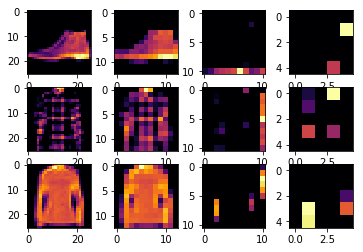

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [5]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.14.0
Epoch 1/10
60000/60000 [==============================] - 31s 517us/sample - loss: 0.1449 - acc: 0.9570
Epoch 2/10
60000/60000 [==============================] - 31s 511us/sample - loss: 0.0515 - acc: 0.9845
Epoch 3/10
60000/60000 [==============================] - 30s 508us/sample - loss: 0.0336 - acc: 0.9894
Epoch 4/10
60000/60000 [==============================] - 32s 538us/sample - loss: 0.0205 - acc: 0.9940
Epoch 5/10
60000/60000 [==============================] - 31s 518us/sample - loss: 0.0148 - acc: 0.9952
Epoch 6/10
60000/60000 [==============================] - 34s 572us/sample - loss: 0.0107 - acc: 0.9965
Epoch 7/10
60000/60000 [==============================] - 31s 521us/sample - loss: 0.0069 - acc: 0.9977
Epoch 8/10
60000/60000 [==============================] - 31s 517us/sample - loss: 0.0078 - acc: 0.9974
Epoch 9/10
60000/60000 [==============================] - 34s 568us/sample - loss: 0.0049 - acc: 0.9985
Epoch 10/10
10000/10000 [==============================] 